In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
import keras
import os
import shutil
import imghdr

In [ ]:
print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
def detectar_corrupcion(directory):
    images_corruptas = []
    images_no_corruptas = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            try:
                # Verificar el tipo de archivo de la imagen
                image_type = imghdr.what(file_path)
                if image_type and (image_type.lower() == "jpg" or image_type.lower() == "jpeg"):
                    # Intentar abrir la imagen
                    with Image.open(file_path) as img:
                        # Verificar si la imagen se puede cargar correctamente
                        img.load()
                        # Verificar el formato de compresión
                        if img.format == "JPEG":
                            images_no_corruptas.append(filename)
                else:
                    images_corruptas.append(filename)
            except Exception as e:
                images_corruptas.append(file_path)
    for corrupt_file in images_corruptas:
      corrupt_file_path = os.path.join(directory, corrupt_file)
      os.remove(corrupt_file_path)
      print(f"El archivo corrupto {corrupt_file} ha sido eliminado.")
    return images_corruptas

In [ ]:
routes_list = [r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Bacterial_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Early_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Late_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Leaf_Mold",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Septoria_leaf_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Spider_mites_Two-spotted_spider_mite",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Target_Spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_Yellow_Leaf_Curl_Virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_mosaic_virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/healthy",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/train/powdery_mildew",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Bacterial_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Early_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Late_blight",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Leaf_Mold",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Septoria_leaf_spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Spider_mites_Two-spotted_spider_mite",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Target_Spot",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Tomato_Yellow_Leaf_Curl_Virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/Tomato_mosaic_virus",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/healthy",
               r"/content/drive/MyDrive/Tomates_proyecto/optimizado/valid/powdery_mildew"]

In [ ]:
for directory in routes_list:
  print(detectar_corrupcion(directory))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
for directory in routes_list:
  if os.path.isdir(directory):
    num_files = len([filename for filename in os.listdir(directory)])
    print(f"Number of files in '{directory}': {num_files}")


Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Bacterial_spot': 2593
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Early_blight': 2458
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Late_blight': 3001
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Leaf_Mold': 2504
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Septoria_leaf_spot': 2882
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Spider_mites_Two-spotted_spider_mite': 1717
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Target_Spot': 1827
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_Yellow_Leaf_Curl_Virus': 1792
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train/Tomato_mosaic_virus': 1900
Number of files in '/content/drive/MyDrive/Tomates_proyecto/optimizado/train

In [ ]:
data_dir = "/content/drive/MyDrive/Tomates_proyecto/optimizado/train"

def database(data_dir, validation_split=0.2, seed=1534, batch_size=None):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='training',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=validation_split,
        subset='validation',
        seed=seed,
        batch_size=batch_size,
        label_mode='int',
        image_size=(224, 224)
    )

    class_names = train_dataset.class_names
    num_classes = len(class_names)

    ds_info = {
        'num_classes': num_classes,
        'class_names': class_names
    }

    return train_dataset, validation_dataset, ds_info

train_dataset, validation_dataset, ds_info = database(data_dir)

print("Number of classes:", ds_info['num_classes'])

Found 23904 files belonging to 11 classes.
Using 19124 files for training.
Found 23904 files belonging to 11 classes.
Using 4780 files for validation.
Number of classes: 11


In [ ]:
ds_info['class_names']

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites_Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [ ]:
NUM_CLASSES = ds_info['num_classes']

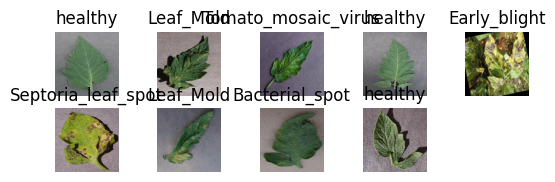

In [ ]:
def format_label(label):
  return ds_info['class_names'][label]

label_info = ds_info['class_names']
for i, (image, label) in enumerate(train_dataset.take(9)):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title('{}'.format(format_label(label)))
  plt.axis('off')

In [ ]:
from keras import layers


data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomContrast(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomCrop(224, 224),
    layers.GaussianNoise(0.1)
])

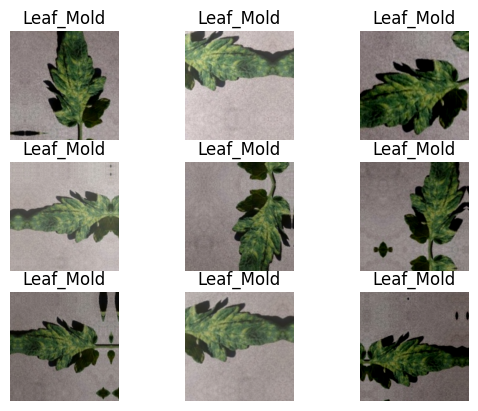

In [ ]:
for image, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [ ]:
def preprocess_train(image, label):
    image = tf.expand_dims(image, axis=0)
    image = data_augmentation(image)
    image = tf.squeeze(image, axis=0)
    return image, label

def preprocess_validation(image, label):
    # En el conjunto de validación solo se normalizan las imágenes (si es necesario)
    return image, label

# Aplicar preprocesamiento a los conjuntos de datos
train_dataset = train_dataset.map(preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_validation, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.batch(100).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(100).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
for images, labels in train_dataset.take(1):  # Tomar solo un lote de datos
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (100, 224, 224, 3)
Label batch shape: (100,)


In [ ]:
from keras.applications import ResNet50
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# Definir el modelo ResNet50 con regularización
def create_resnet50_model(input_shape=(224, 224, 3), num_classes=ds_info['num_classes']):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Crear el modelo
model = create_resnet50_model()

# Definir los callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Tomates_proyecto/best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-7)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=60,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

# Cargar los mejores pesos y evaluar
model.load_weights('/content/drive/MyDrive/Tomates_proyecto/best_model.weights.h5')
loss, accuracy = model.evaluate(validation_dataset)
print(f'Best Validation accuracy: {accuracy * 100:.2f}%')

Epoch 1/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 1692s 9s/step - accuracy: 0.2833 - loss: 15.9148 - val_accuracy: 0.6364 - val_loss: 13.1558 - learning_rate: 1.0000e-04
Epoch 2/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 85s 439ms/step - accuracy: 0.5496 - loss: 13.2341 - val_accuracy: 0.6868 - val_loss: 11.4900 - learning_rate: 1.0000e-04
Epoch 3/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 87s 450ms/step - accuracy: 0.6046 - loss: 11.4791 - val_accuracy: 0.7266 - val_loss: 9.9923 - learning_rate: 1.0000e-04
Epoch 4/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 85s 439ms/step - accuracy: 0.6418 - loss: 10.0240 - val_accuracy: 0.7439 - val_loss: 8.7402 - learning_rate: 1.0000e-04
Epoch 5/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 85s 440ms/step - accuracy: 0.6657 - loss: 8.7445 - val_accuracy: 0.7628 - val_loss: 7.6170 - learning_rate: 1.0000e-04
Epoch 6/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 87s 453ms/step - accuracy: 0.6813 - loss: 7.6589 - val_accuracy: 0.7661 - val_loss: 6.7130 - learning_rate: 1.0000e-04
Epoch 7/60
192/192 ━━━━━━━━━━━━━━━━━━━━ 8

In [ ]:
# Guardar los pesos del modelo
model.save_weights('/content/drive/MyDrive/Tomates_proyecto/resnet50_weights.weights.h5')
print("Model weights saved successfully in Google Drive.")


Model weights saved successfully in Google Drive.


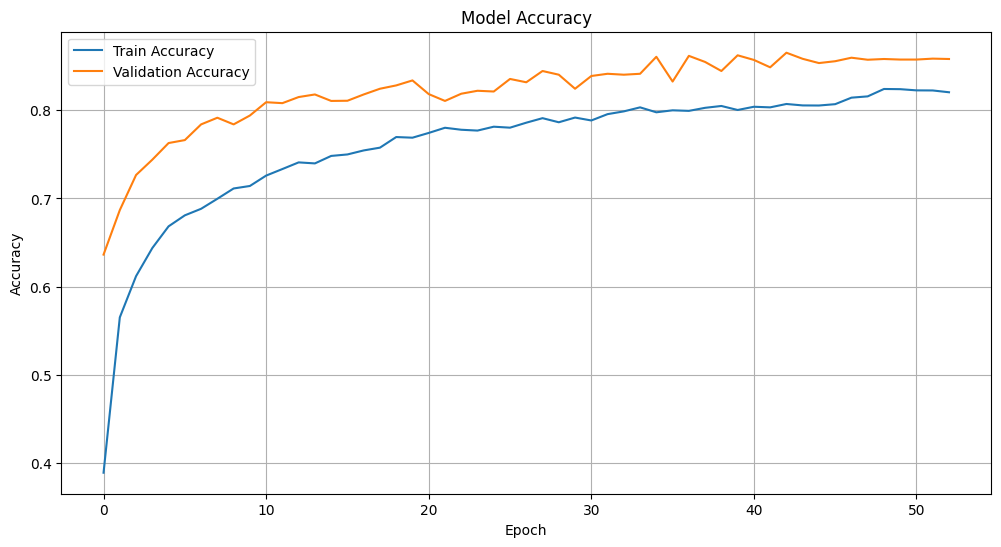

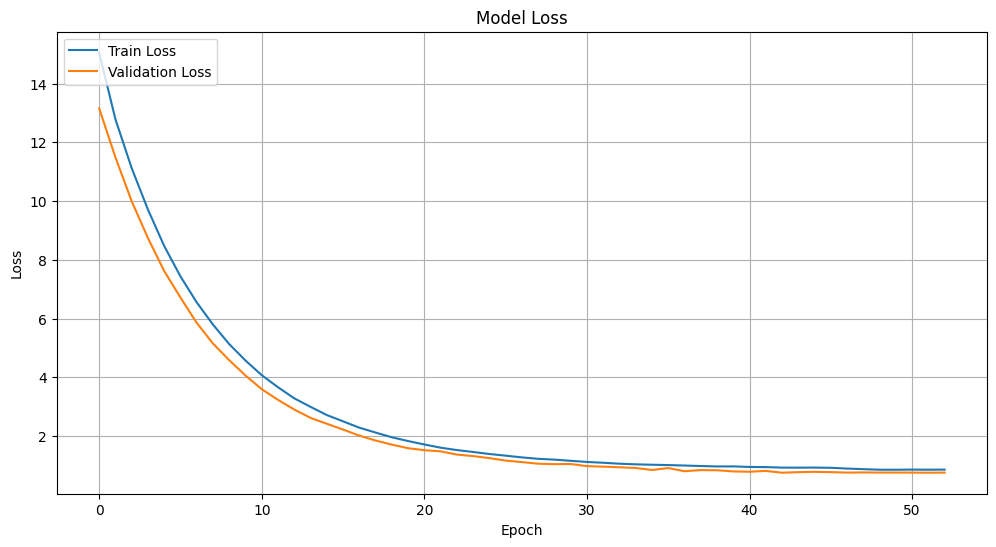

In [ ]:
# Gráficas de precisión y pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()